In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(rc={'figure.figsize': (11.7,8.27)})

In [129]:
data = pd.read_csv("ds_salaries.csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [130]:
df = pd.DataFrame(data)

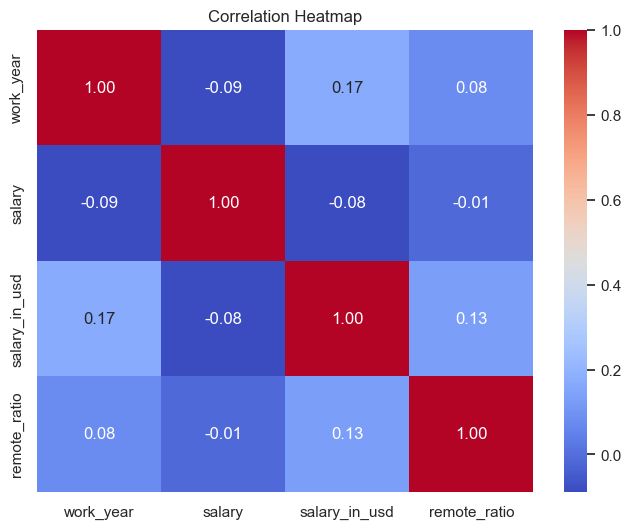

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Membuat Model Linear Regresi

In [132]:
# Memisahkan fitur dan target
X = df[["work_year", "remote_ratio", "experience_level"]]
y = df["salary_in_usd"]

# Mengubah fitur kategorikal menjadi dummy variable
X = pd.get_dummies(X, drop_first=True)

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linier
model = sm.OLS(y_train, X_train).fit()

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan ringkasan model
print(model.summary())

# Menampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     32.14
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.90e-28
Time:                        18:21:30   Log-Likelihood:                -6048.3
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     479   BIC:                         1.213e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.032e+07   8

#### Membuat Model Random Forest Regresi

In [133]:
from sklearn.ensemble import RandomForestRegressor

X = df[["work_year", "remote_ratio", "experience_level"]]
y = df["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data_kategorikal = ["experience_level"]
ubah_kategorikal = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", ubah_kategorikal, data_kategorikal)
    ],
    remainder="passthrough"  # Keep other numerical features as they are
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_estimators=100))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

MSE, r2

(3115905942.8739104, 0.18699290232895194)

In [150]:
from scipy.stats import norm

import statsmodels.api as sm

import pandas as pd

df = pd.read_csv("ds_salaries.csv")

X = df[["work_year", "remote_ratio", "experience_level"]]
y = df["salary_in_usd"]


X_processed = pd.get_dummies(X, columns=["experience_level"], drop_first=True)

X_processed = sm.add_constant(X_processed)

model = sm.OLS(y, X_processed).fit()

print(model.summary())

results = []

for variable in model.params.index:
    if variable == "const":
        continue  # Skip the intercept
    
    coef = model.params[variable]
    std_err = model.bse[variable]
    
    z_stat = coef / std_err
    
    p_value = 2 * norm.sf(abs(z_stat))
    
    results.append({
        "Variable": variable,
        "Coefficient": coef,
        "Std. Error": std_err,
        "Z-Statistic": z_stat,
        "P-Value": p_value,
        "Significant (p < 0.05)": p_value < 0.05
    })

z_test_results = pd.DataFrame(results)
z_test_results = z_test_results.sort_values(by="P-Value") 
print(z_test_results)



                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     40.18
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.15e-35
Time:                        23:48:25   Log-Likelihood:                -7553.4
No. Observations:                 607   AIC:                         1.512e+04
Df Residuals:                     601   BIC:                         1.515e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.889e+06   7

#### Interpretasi
##### Variable experience_level_EX mempunyai hubungan signifikan dengan salary_in_usd
##### Variable experience_level_SE mempunyai hubungan signifikan dengan salary_in_usd
##### Variable experience_level_MI mempunyai hubungan signifikan dengan salary_in_usd
##### Variable remote_ratio mempunyai hubungan signifikan dengan salary_in_usd
##### Variable work_year tidak mempunyai hubungan signifikan dengan salary_in_usd

In [151]:
import statsmodels.api as sm

X_processed = pd.get_dummies(X, columns=["experience_level"], drop_first=True)
X_processed = sm.add_constant(X_processed)

model = sm.OLS(y, X_processed).fit()

print(model.summary())

results = []

for variable in model.params.index:
    if variable == "const":
        continue
    
    coef = model.params[variable]
    std_err = model.bse[variable]
    
    t_stat = coef / std_err
    
    from scipy.stats import t
    df = model.df_resid
    p_value = 2 * t.sf(abs(t_stat), df)
    
    results.append({
        "Variable": variable,
        "Coefficient": coef,
        "Std. Error": std_err,
        "T-Statistic": t_stat,
        "P-Value": p_value,
        "Significant (p < 0.05)": p_value < 0.05
    })

import pandas as pd
t_test_results = pd.DataFrame(results)
t_test_results = t_test_results.sort_values(by="P-Value")
print(t_test_results)


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     40.18
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.15e-35
Time:                        23:53:45   Log-Likelihood:                -7553.4
No. Observations:                 607   AIC:                         1.512e+04
Df Residuals:                     601   BIC:                         1.515e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.889e+06   7